In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [176]:

df_1 = pd.read_csv('data/uber_nyc_2023_1.csv')
df_2 = pd.read_csv('data/uber_nyc_2023_2.csv')
df_3 = pd.read_csv('data/uber_nyc_2023_3.csv')


In [177]:
df = pd.concat([df_1, df_2, df_3])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1670353 entries, 0 to 556783
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1670353 non-null  int64  
 1   DOLocationID          1670353 non-null  int64  
 2   PULocationID          1670353 non-null  int64  
 3   hvfhs_license_num     1670353 non-null  object 
 4   request_datetime      1670353 non-null  object 
 5   trip_miles            1670353 non-null  float64
 6   trip_time             1670353 non-null  int64  
 7   base_passenger_fare   1670353 non-null  float64
 8   tolls                 1670353 non-null  float64
 9   bcf                   1670353 non-null  float64
 10  sales_tax             1670353 non-null  float64
 11  congestion_surcharge  1670353 non-null  float64
 12  airport_fee           1670353 non-null  float64
 13  tips                  1670353 non-null  float64
 14  driver_pay            1670353 non-null  

<Axes: >

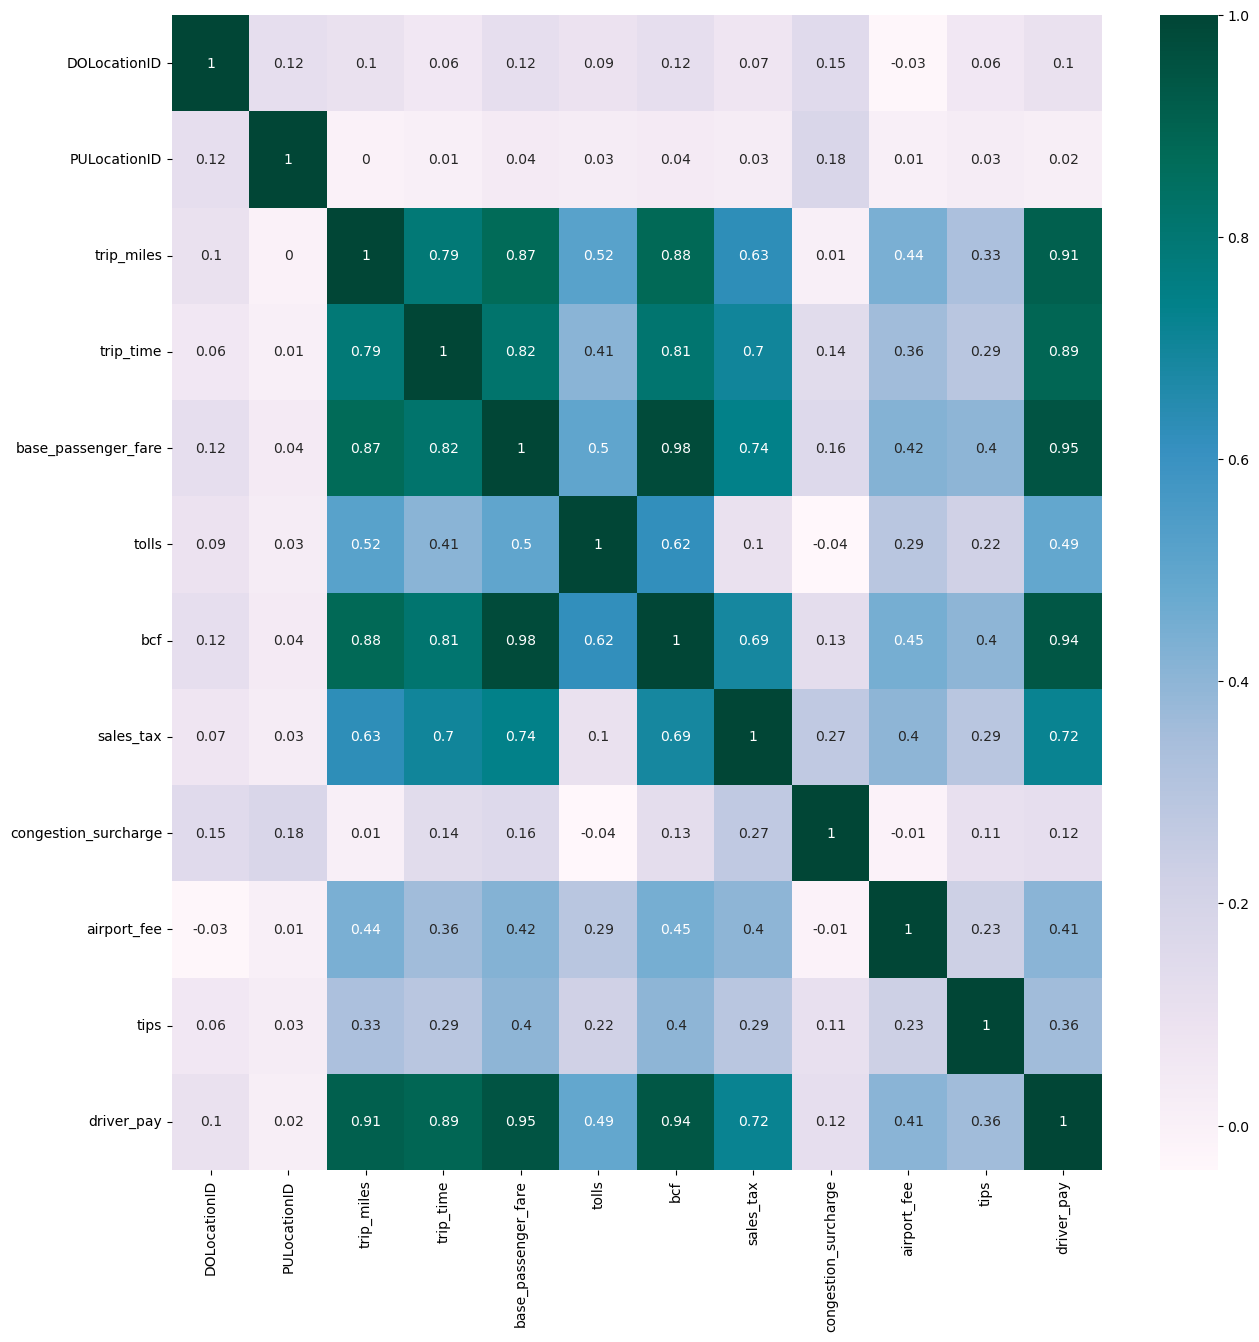

In [178]:
df_ints = df.drop(columns=['Unnamed: 0', 'hvfhs_license_num', 'request_datetime', 'date', 'PUBorough', 'PUZone',\
                           'DOBorough', 'DOZone'])

fig, ax =  plt.subplots(figsize=(15,15))
sns.heatmap(round(df_ints.corr(),2), annot=True, cmap='PuBuGn')


In [415]:
def get_coords():
    # Import coordinates df
    df_taxi_zones = pd.read_csv('data/taxi_zone_lookup_coordinates.csv')

    # Merge df with coordinates_df on DOLocationID
    df_merged_DO = pd.merge(df, df_taxi_zones, left_on='DOLocationID', right_on='LocationID', suffixes=('', '_DO'))

    # Merge the resulting dataframe with coordinates_df again on PULocationID
    df_merged_both = pd.merge(df_merged_DO, df_taxi_zones, left_on='PULocationID',\
                              right_on='LocationID', suffixes=('_DO', '_PU'))\
                            .drop(columns=['LocationID_DO', 'LocationID_PU', 'service_zone_DO',\
                                           'service_zone_PU', 'Borough_PU', 'Zone_PU','Borough_DO', 'Zone_DO'])
    

    
    return df_merged_both

get_coords().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670353 entries, 0 to 1670352
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1670353 non-null  int64  
 1   DOLocationID          1670353 non-null  int64  
 2   PULocationID          1670353 non-null  int64  
 3   hvfhs_license_num     1670353 non-null  object 
 4   request_datetime      1670353 non-null  object 
 5   trip_miles            1670353 non-null  float64
 6   trip_time             1670353 non-null  int64  
 7   base_passenger_fare   1670353 non-null  float64
 8   tolls                 1670353 non-null  float64
 9   bcf                   1670353 non-null  float64
 10  sales_tax             1670353 non-null  float64
 11  congestion_surcharge  1670353 non-null  float64
 12  airport_fee           1670353 non-null  float64
 13  tips                  1670353 non-null  float64
 14  driver_pay            1670353 non-

In [461]:
# Get the zones for dropoff or pickup, binned by frequency
def get_zones(df, col):
    # Reduce the columns
    df = df[['DOLocationID', 'PULocationID']]

    # Set variable for the column not being called
    for i in df.columns:
        if col != i:
            other_col = i

    # Set 5 bins based on frequency
    df[col[:2] + "_bins"] = pd.cut(df[col], bins = 5, precision = 0,  labels=['Infrequent', 'Frequent',\
                                                                             'Regular', 'Common', 'Very Common'])

    # Reduce to unique taxi zone ID's
    df = df.drop_duplicates(subset=[col]).drop(columns=[other_col])

    # Return JSON
    return df.to_json(orient='records')

get_zones(df, 'PULocationID')

   PULocationID      PU_bins
0           223  Very Common
1           236  Very Common
2            60     Frequent
3           175       Common
4           198       Common


/var/folders/1n/vt92nzjx09bg0bnkhkjgfbcw0000gn/T/ipykernel_80529/2473331808.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col[:2] + "_bins"] = pd.cut(df[col], bins = 5, precision = 0,  labels=['Infrequent', 'Frequent',\
